In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
rewards = np.loadtxt('../output.txt')

In [11]:
def running_average(window_size, data):
    average_data = []
    for ind in range(len(data) - window_size + 1):
        average_data.append(np.mean(data[ind:ind+window_size]))
    for ind in range(window_size - 1):
        average_data.insert(0, np.nan)
    return average_data

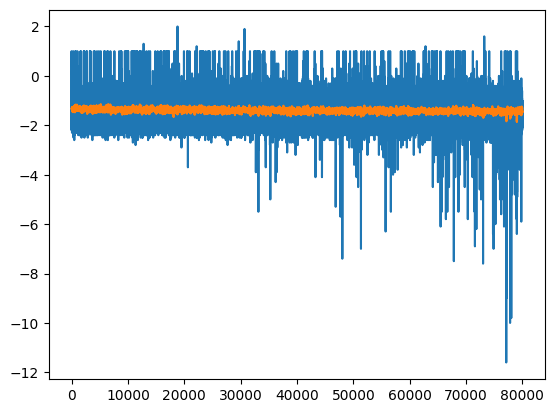

In [15]:
plt.plot(rewards)
plt.plot(running_average(50, rewards))